In [1]:
import pandas as pd

# Sample data to simulate Fake and True news
fake_data = {
    "title": ["Fake Headline 1", "Fake Headline 2"],
    "text": ["This is fake news article 1 content.", "This is fake news article 2 content."],
    "label": ["FAKE", "FAKE"]
}

true_data = {
    "title": ["True Headline 1", "True Headline 2"],
    "text": ["This is true news article 1 content.", "This is true news article 2 content."],
    "label": ["TRUE", "TRUE"]
}

# Convert to DataFrames
fake_df = pd.DataFrame(fake_data)
true_df = pd.DataFrame(true_data)

# Combine datasets
df = pd.concat([fake_df, true_df], ignore_index=True)

# Shuffle the combined dataset
df = df.sample(frac=1).reset_index(drop=True)

# Show the first few rows
df.head()


,title,text,label
0,True Headline 1,This is true news article 1 content.,TRUE
1,Fake Headline 1,This is fake news article 1 content.,FAKE
2,True Headline 2,This is true news article 2 content.,TRUE
3,Fake Headline 2,This is fake news article 2 content.,FAKE


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   4 non-null      object
 1   text    4 non-null      object
 2   label   4 non-null      object
dtypes: object(3)
memory usage: 228.0+ bytes
None

Label Counts:
label
FAKE    2
TRUE    2
Name: count, dtype: int64


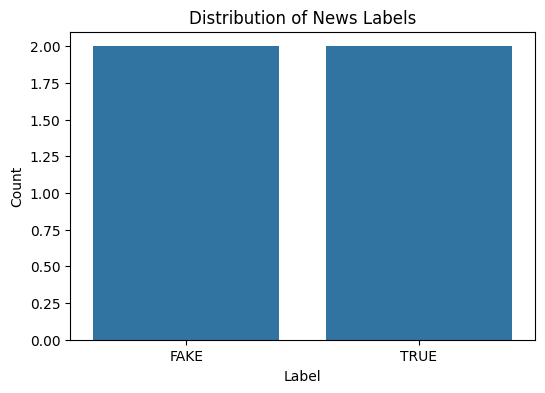


🔍 Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Confusion Matrix:
 [[0 1]
 [0 0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [2]:
# 📌 Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 📌 Step 2: Create Sample Dataset (Fake + True)
fake_data = {
    "title": ["Fake Headline 1", "Fake Headline 2"],
    "text": ["This is fake news article 1 content.", "This is fake news article 2 content."],
    "label": ["FAKE", "FAKE"]
}

true_data = {
    "title": ["True Headline 1", "True Headline 2"],
    "text": ["This is true news article 1 content.", "This is true news article 2 content."],
    "label": ["TRUE", "TRUE"]
}

fake_df = pd.DataFrame(fake_data)
true_df = pd.DataFrame(true_data)

df = pd.concat([fake_df, true_df], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)

# 📌 Step 3: Exploratory Data Analysis
print("Dataset Info:")
print(df.info())

print("\nLabel Counts:")
print(df['label'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Distribution of News Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# 📌 Step 4: Preprocessing Text
df['content'] = df['title'] + " " + df['text']
df['label_num'] = df['label'].apply(lambda x: 1 if x == "TRUE" else 0)

def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub(r'\d+', '', text)
    return text

df['content_clean'] = df['content'].apply(clean_text)

# 📌 Step 5: Train/Test Split and TF-IDF
X_train, X_test, y_train, y_test = train_test_split(df['content_clean'], df['label_num'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 📌 Step 6: Train Model (Logistic Regression)
model = LogisticRegression()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

# 📌 Step 7: Evaluation
print("\n🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC()
}

for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.0000
Naive Bayes Accuracy: 1.0000
SVM Accuracy: 1.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


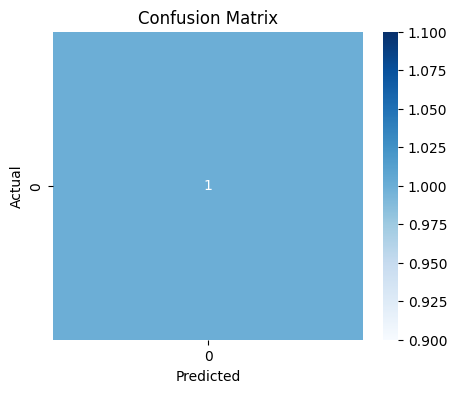

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


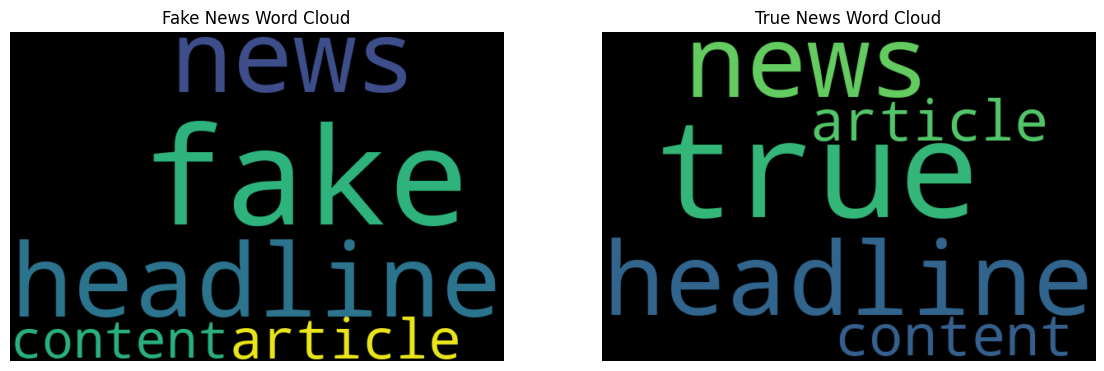

In [5]:
from wordcloud import WordCloud

# Word cloud for fake news
fake_words = " ".join(df[df.label == 'FAKE']['content_clean'])
wordcloud_fake = WordCloud(width=600, height=400).generate(fake_words)

# Word cloud for real news
real_words = " ".join(df[df.label == 'TRUE']['content_clean'])
wordcloud_real = WordCloud(width=600, height=400).generate(real_words)

plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title("Fake News Word Cloud")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title("True News Word Cloud")
plt.axis('off')

plt.show()


In [6]:
import joblib
joblib.dump(model, 'fake_news_model.pkl')


['fake_news_model.pkl']